In [1]:
# MNIST

In [2]:
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dense(10, activation='softmax')) 
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

# preprocessing
X_train = X_train.reshape((60000, 28*28))
X_train = X_train/255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test/255

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
net.fit(X_train, y_train, epochs=1, batch_size=128)

469/469 [==============================] - 12s 25ms/step - loss: 0.2107 - acc: 0.9356


In [6]:
test_loss, test_acc = net.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1026 - acc: 0.9672


In [7]:
X_train.shape

(60000, 784)

In [8]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
val = net.fit(partial_X_train,partial_y_train,epochs=20, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/20
391/391 [==============================] - 10s 26ms/step - loss: 0.0762 - acc: 0.9758 - val_loss: 0.0760 - val_acc: 0.9772
Epoch 2/20
391/391 [==============================] - 10s 26ms/step - loss: 0.0469 - acc: 0.9846 - val_loss: 0.0909 - val_acc: 0.9738
Epoch 3/20
391/391 [==============================] - 10s 26ms/step - loss: 0.0369 - acc: 0.9877 - val_loss: 0.1170 - val_acc: 0.9689
Epoch 4/20
391/391 [==============================] - 10s 26ms/step - loss: 0.0304 - acc: 0.9898 - val_loss: 0.0852 - val_acc: 0.9771
Epoch 5/20
391/391 [==============================] - 10s 26ms/step - loss: 0.0246 - acc: 0.9913 - val_loss: 0.0742 - val_acc: 0.9820
Epoch 6/20
391/391 [==============================] - 10s 26ms/step - loss: 0.0241 - acc: 0.9919 - val_loss: 0.0966 - val_acc: 0.9762
Epoch 7/20
391/391 [==============================] - 10s 26ms/step - loss: 0.0184 - acc: 0.9939 - val_loss: 0.0871 - val_acc: 0.9798
Epoch 8/20
391/391 [==============================] - 10s 26ms

In [10]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']

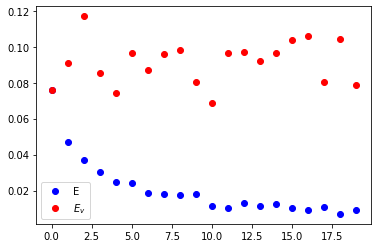

In [11]:
x = np.arange(0,len(loss))
plt.plot(x,loss,'bo',label='E')
plt.plot(x,val_loss,'ro',label='$E_v$')
plt.legend()

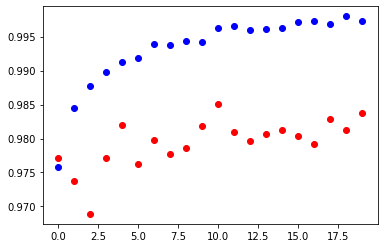

In [12]:
acc = val_dict['acc']
val_acc = val_dict['val_acc']
plt.plot(x,acc,'bo',label='Accuracy')
plt.plot(x,val_acc,'ro',label='A_v')

In [13]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(10, activation='softmax')) 
model.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

In [14]:
val2= model.fit(partial_X_train,partial_y_train,epochs=20, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/20
391/391 [==============================] - 8s 20ms/step - loss: 0.3745 - acc: 0.8851 - val_loss: 0.1435 - val_acc: 0.9535
Epoch 2/20
391/391 [==============================] - 8s 20ms/step - loss: 0.1715 - acc: 0.9475 - val_loss: 0.1146 - val_acc: 0.9656
Epoch 3/20
391/391 [==============================] - 8s 20ms/step - loss: 0.1335 - acc: 0.9589 - val_loss: 0.0916 - val_acc: 0.9740
Epoch 4/20
391/391 [==============================] - 8s 20ms/step - loss: 0.1084 - acc: 0.9673 - val_loss: 0.0791 - val_acc: 0.9765
Epoch 5/20
391/391 [==============================] - 8s 20ms/step - loss: 0.0964 - acc: 0.9696 - val_loss: 0.0740 - val_acc: 0.9780
Epoch 6/20
391/391 [==============================] - 8s 20ms/step - loss: 0.0855 - acc: 0.9742 - val_loss: 0.0742 - val_acc: 0.9785
Epoch 7/20
391/391 [==============================] - 8s 20ms/step - loss: 0.0787 - acc: 0.9757 - val_loss: 0.0740 - val_acc: 0.9780
Epoch 8/20
391/391 [==============================] - 9s 22ms/step - 

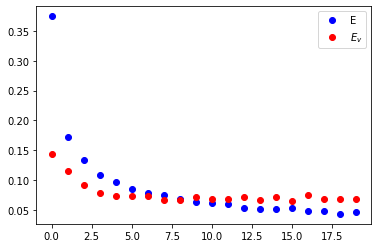

In [15]:
val_dict = val2.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']

x = np.arange(0,len(loss))
plt.plot(x,loss,'bo',label='E')
plt.plot(x,val_loss,'ro',label='$E_v$')
plt.legend()

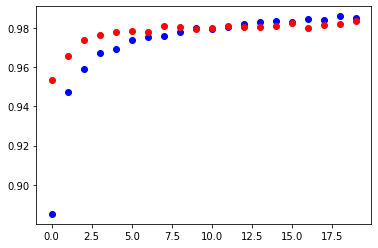

In [16]:
acc = val_dict['acc']
val_acc = val_dict['val_acc']
plt.plot(x,acc,'bo',label='Accuracy')
plt.plot(x,val_acc,'ro',label='A_v')

In [17]:
test_loss, test_acc = net.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0934 - acc: 0.9821


In [18]:
test_loss, test_acc = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0675 - acc: 0.9824
